In [862]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [863]:
df = pd.read_csv("input.csv")

In [864]:
df.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3
1,Avocados,1,0,0,0,160,15.0,2.0,0.55,12.0,7,485.0,8.5,6.7,0,0.7
2,Bananas,1,0,0,0,89,0.3,1.1,0.26,5.0,1,358.0,23.0,2.6,0,12.0
3,Bagels made in wheat,0,1,1,0,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1
4,Berries,1,0,0,0,349,0.4,14.0,6.80,190.0,298,77.0,77.0,13.0,0,46.0


In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     85 non-null     object 
 1   Breakfast      85 non-null     int64  
 2   Lunch          85 non-null     int64  
 3   Dinner         85 non-null     int64  
 4   VegNovVeg      85 non-null     object 
 5   Calories       85 non-null     int64  
 6   Fats           85 non-null     float64
 7   Proteins       85 non-null     float64
 8   Iron           85 non-null     float64
 9   Calcium        85 non-null     float64
 10  Sodium         85 non-null     int64  
 11  Potassium      85 non-null     float64
 12  Carbohydrates  85 non-null     float64
 13  Fibre          85 non-null     float64
 14  VitaminD       85 non-null     int64  
 15  Sugars         85 non-null     float64
dtypes: float64(8), int64(6), object(2)
memory usage: 10.8+ KB


In [866]:
df.drop(df.columns[[4,8,9,10,11,13,14,15]],inplace=True,axis = 1)

In [867]:
df.head()

,Food_items,Breakfast,Lunch,Dinner,Calories,Fats,Proteins,Carbohydrates
0,Asparagus Cooked,0,1,1,22,0.2,2.4,4.1
1,Avocados,1,0,0,160,15.0,2.0,8.5
2,Bananas,1,0,0,89,0.3,1.1,23.0
3,Bagels made in wheat,0,1,1,250,1.5,10.0,49.0
4,Berries,1,0,0,349,0.4,14.0,77.0


# BREAKFAST ANALYSIS

In [868]:
breakfast = df[df['Breakfast'] == 1]
breakfast.drop(["Breakfast","Lunch","Dinner","Calories"],inplace=True,axis=1)
breakfast.head()

C:\Users\Brandon Williams\AppData\Local\Temp\ipykernel_15096\3134382069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakfast.drop(["Breakfast","Lunch","Dinner","Calories"],inplace=True,axis=1)


,Food_items,Fats,Proteins,Carbohydrates
1,Avocados,15.0,2.0,8.5
2,Bananas,0.3,1.1,23.0
4,Berries,0.4,14.0,77.0
8,American cheese,24.0,20.0,8.3
9,Coffee,0.0,0.3,0.2


In [869]:
breakfast.shape

(42, 4)

In [870]:
breakfast.head()

,Food_items,Fats,Proteins,Carbohydrates
1,Avocados,15.0,2.0,8.5
2,Bananas,0.3,1.1,23.0
4,Berries,0.4,14.0,77.0
8,American cheese,24.0,20.0,8.3
9,Coffee,0.0,0.3,0.2


In [871]:
def makeCombinations(df):
    result = []

    for start in range(len(df)):
        combined_row = df.iloc[start].copy()
        result.append(combined_row.to_dict())
        for next_row in range(start + 1, len(df)):
            current_combined = {}
            for col in df.columns:
                if pd.api.types.is_numeric_dtype(df[col]):
                    current_combined[col] = combined_row[col] + df.iloc[next_row][col]
                else:
                    if isinstance(combined_row[col], list):
                        current_combined[col] = combined_row[col] + [df.iloc[next_row][col]]
                    else:
                        current_combined[col] = [combined_row[col], df.iloc[next_row][col]]
        
        
            result.append(current_combined)
        
       
            combined_row = pd.Series(current_combined)
    combined_df = pd.DataFrame(result)

    return combined_df

In [872]:
breakfast = makeCombinations(breakfast)
breakfast

,Food_items,Fats,Proteins,Carbohydrates
0,Avocados,15.0,2.0,8.5
1,"[Avocados, Bananas]",15.3,3.1,31.5
2,"[Avocados, Bananas, Berries]",15.7,17.1,108.5
3,"[Avocados, Bananas, Berries, American cheese]",39.7,37.1,116.8
4,"[Avocados, Bananas, Berries, American cheese, ...",39.7,37.4,117.0
...,...,...,...,...
898,"[Banana Chips, Honey]",34.0,2.6,140.0
899,"[Banana Chips, Honey, Chocolate milk]",64.0,10.3,199.0
900,Honey,0.0,0.3,82.0
901,"[Honey, Chocolate milk]",30.0,8.0,141.0


In [873]:
from sklearn.cluster import KMeans
def ValidClusters(df):

    X = df.iloc[:,1:].values
    wcss = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.scatter(range(1,11),wcss,color = "blue")
    plt.plot(range(1,11),wcss,color = "red")
    plt.title("Elbow Method")
    plt.xlabel(" range ")
    plt.ylabel(wcss)
    plt.show()
    

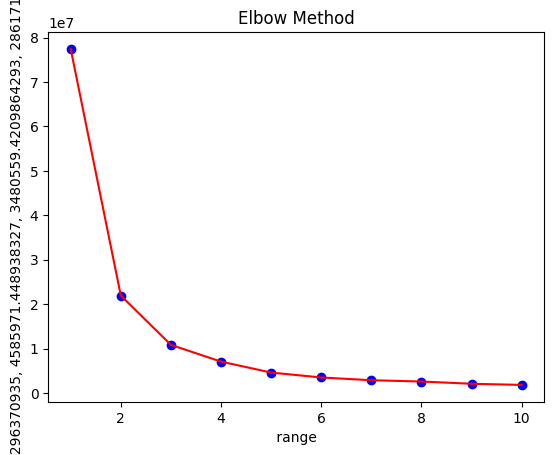

In [874]:
ValidClusters(breakfast)

In [875]:
X_b = breakfast.iloc[:,1:].values
print(X_b)
kbmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
Y = kbmeans.fit_predict(X_b)

[[ 15.    2.    8.5]
 [ 15.3   3.1  31.5]
 [ 15.7  17.1 108.5]
 ...
 [  0.    0.3  82. ]
 [ 30.    8.  141. ]
 [ 30.    7.7  59. ]]


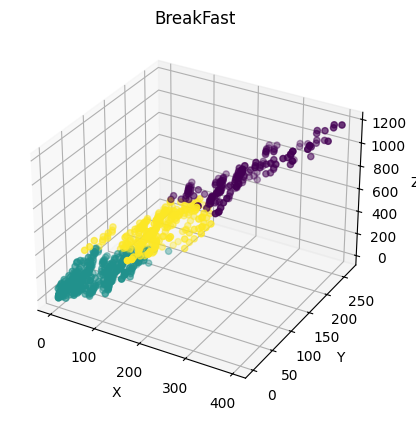

In [876]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(breakfast['Fats'], breakfast['Proteins'], breakfast['Carbohydrates'], c=kbmeans.labels_, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'BreakFast')

plt.show()

In [877]:
from scipy.spatial.distance import cdist
def makePrediction(X,kmeans,df,protein,fat,carbs):
    data_point = [[protein,fat,carbs]]
    pred_cluster = kmeans.predict(data_point)[0]
    elems = X[kmeans.labels_ == pred_cluster]
    distances = cdist(elems,data_point, metric='euclidean').flatten()
    sorted_indices = np.argsort(distances)
    sorted_elements = elems[sorted_indices]
    top_elem = sorted_elements[0]
    filtered_row = df[
    (df["Fats"] == top_elem[0]) & 
    (df["Proteins"] == top_elem[1]) & 
    (df["Carbohydrates"] == top_elem[2])
    ]
    food_items = filtered_row["Food_items"].values
    return food_items
    
    


predBreakFast = makePrediction(X_b,kbmeans,breakfast,50,40,160).tolist()[0]
predBreakFast


['Berries', 'American cheese', 'Coffee', 'Corn', 'Dark chocolates']

# LUNCH ANALYSIS

In [878]:
lunch = df[df['Lunch'] == 1]
lunch.drop(["Breakfast","Lunch","Dinner","Calories"],inplace=True,axis=1)
lunch.head()

C:\Users\Brandon Williams\AppData\Local\Temp\ipykernel_15096\1007252349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch.drop(["Breakfast","Lunch","Dinner","Calories"],inplace=True,axis=1)


,Food_items,Fats,Proteins,Carbohydrates
0,Asparagus Cooked,0.2,2.4,4.1
3,Bagels made in wheat,1.5,10.0,49.0
5,Brocolli,0.5,3.8,3.1
6,Brown Rice,2.7,7.5,76.0
7,Cauliflower,0.3,3.0,6.3


In [879]:
lunch = makeCombinations(lunch)
lunch

,Food_items,Fats,Proteins,Carbohydrates
0,Asparagus Cooked,0.2,2.4,4.1
1,"[Asparagus Cooked, Bagels made in wheat]",1.7,12.4,53.1
2,"[Asparagus Cooked, Bagels made in wheat, Broco...",2.2,16.2,56.2
3,"[Asparagus Cooked, Bagels made in wheat, Broco...",4.9,23.7,132.2
4,"[Asparagus Cooked, Bagels made in wheat, Broco...",5.2,26.7,138.5
...,...,...,...,...
856,"[Chicken Popcorn, Turkey cooked]",32.0,45.0,21.0
857,"[Chicken Popcorn, Turkey cooked, Oyster cooked]",36.0,74.0,21.0
858,Turkey cooked,10.0,27.0,0.0
859,"[Turkey cooked, Oyster cooked]",14.0,56.0,0.0


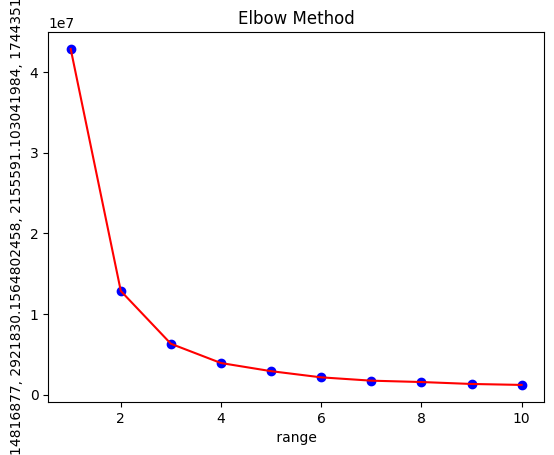

In [880]:
ValidClusters(lunch)

In [881]:
X_l = lunch.iloc[:,1:].values
print(X_l)
klmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
Y = klmeans.fit_predict(X_l)

[[ 0.2  2.4  4.1]
 [ 1.7 12.4 53.1]
 [ 2.2 16.2 56.2]
 ...
 [10.  27.   0. ]
 [14.  56.   0. ]
 [ 4.  29.   0. ]]


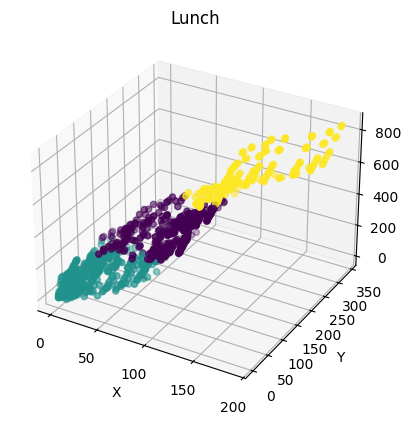

In [882]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(lunch['Fats'], lunch['Proteins'], lunch['Carbohydrates'], c=klmeans.labels_, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Lunch')

plt.show()

In [883]:
predLunch = makePrediction(X_l,klmeans,lunch,70,40,200).tolist()[0]
predLunch

['Chicken Sandwich',
 'Dosa',
 'Idli',
 'Chappati',
 'Tomato',
 'Yogurt',
 'Noodles',
 'Uttapam',
 'Dal Makhani']

# Dinner Analysis

In [884]:
dinner = df[df['Dinner'] == 1]
dinner.drop(["Breakfast","Lunch","Dinner","Calories"],inplace=True,axis=1)
dinner.head()

C:\Users\Brandon Williams\AppData\Local\Temp\ipykernel_15096\1864991372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dinner.drop(["Breakfast","Lunch","Dinner","Calories"],inplace=True,axis=1)


,Food_items,Fats,Proteins,Carbohydrates
0,Asparagus Cooked,0.2,2.4,4.1
3,Bagels made in wheat,1.5,10.0,49.0
5,Brocolli,0.5,3.8,3.1
6,Brown Rice,2.7,7.5,76.0
7,Cauliflower,0.3,3.0,6.3


In [885]:
din = makeCombinations(dinner)
din

,Food_items,Fats,Proteins,Carbohydrates
0,Asparagus Cooked,0.2,2.4,4.1
1,"[Asparagus Cooked, Bagels made in wheat]",1.7,12.4,53.1
2,"[Asparagus Cooked, Bagels made in wheat, Broco...",2.2,16.2,56.2
3,"[Asparagus Cooked, Bagels made in wheat, Broco...",4.9,23.7,132.2
4,"[Asparagus Cooked, Bagels made in wheat, Broco...",5.2,26.7,138.5
...,...,...,...,...
1591,"[Strawberry Icecream, Marshmallows]",8.6,5.0,109.0
1592,"[Strawberry Icecream, Marshmallows, Rice Pudding]",8.7,7.7,200.0
1593,Marshmallows,0.2,1.8,81.0
1594,"[Marshmallows, Rice Pudding]",0.3,4.5,172.0


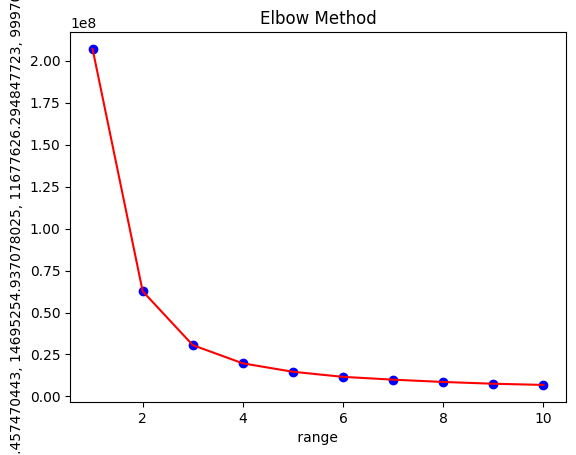

In [886]:
ValidClusters(din)

In [887]:
X_d = din.iloc[:,1:].values
print(X_d)
kdmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
Y = kdmeans.fit_predict(X_d)

[[2.00e-01 2.40e+00 4.10e+00]
 [1.70e+00 1.24e+01 5.31e+01]
 [2.20e+00 1.62e+01 5.62e+01]
 ...
 [2.00e-01 1.80e+00 8.10e+01]
 [3.00e-01 4.50e+00 1.72e+02]
 [1.00e-01 2.70e+00 9.10e+01]]


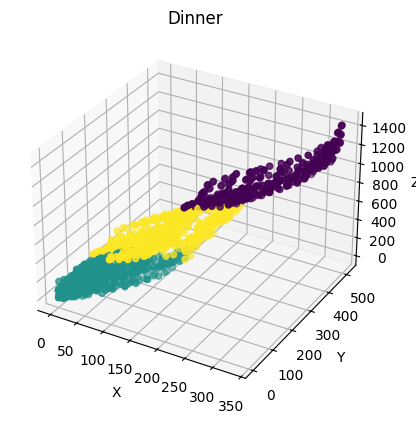

In [888]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(din['Fats'], din['Proteins'], din['Carbohydrates'], c=kdmeans.labels_, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Dinner')

plt.show()

In [889]:
predDinner= makePrediction(X_d,kdmeans,din,70,40,200).tolist()[0]
predDinner

['French Fries',
 'Chicken Burger',
 'Cheese Burger',
 'Chicken Sandwich',
 'Pop Corn - Caramel']

In [890]:

tot_calories = 2100

def split_meals(total_grams, breakfast_perc, lunch_perc, dinner_perc):
    breakfast_grams = total_grams * breakfast_perc
    lunch_grams = total_grams * lunch_perc
    dinner_grams = total_grams * dinner_perc
    return breakfast_grams, lunch_grams, dinner_grams

def makeMacroSplit(calories):


    protein_percentage = 0.35
    fat_percentage = 0.25
    carb_percentage = 0.40


    protein_calories =calories * protein_percentage
    fat_calories = calories * fat_percentage
    carb_calories = calories * carb_percentage


    protein_grams = protein_calories / 4  
    fat_grams = fat_calories / 9        
    carb_grams = carb_calories / 4   
    
    breakfast_percentage = 0.30
    lunch_percentage = 0.50
    dinner_percentage = 0.20
    p_breakfast, p_lunch, p_dinner = split_meals(protein_grams, breakfast_percentage, lunch_percentage, dinner_percentage)
    f_breakfast, f_lunch, f_dinner = split_meals(fat_grams, breakfast_percentage, lunch_percentage, dinner_percentage)
    c_breakfast, c_lunch, c_dinner = split_meals(carb_grams, breakfast_percentage, lunch_percentage, dinner_percentage)

    return (p_breakfast, p_lunch, p_dinner,f_breakfast, f_lunch, f_dinner,c_breakfast, c_lunch, c_dinner)

p_b,p_l,p_d,f_b,f_l,f_d,c_b,c_l,c_d = makeMacroSplit(tot_calories)

print("Breakfast Split : ",p_b,f_b,c_b)
print("Lunch Split : ",p_l,f_l,c_l)
print("Dinner Split : ",p_d,f_d,c_d)

predB= makePrediction(X_b,kbmeans,breakfast,p_b,f_b,c_b).tolist()[0]
predL= makePrediction(X_l,klmeans,lunch,p_l,f_l,c_l).tolist()[0]
predD= makePrediction(X_d,kdmeans,din,p_d,f_d,c_d).tolist()[0]

print("BreakFast : ",predB)
print("Lunch : ",predL)
print("Dinner : ",predD)

Breakfast Split :  55.125 17.5 63.0
Lunch Split :  91.875 29.166666666666668 105.0
Dinner Split :  36.75 11.666666666666668 42.0
BreakFast :  ['Milk', 'Cashew Nuts', 'Orange']
Lunch :  ['Steak Fries', 'Mexican Rice', 'Macroni n Cheese ', 'Chicken Popcorn']
Dinner :  ['Fried Shrimp', 'Spaghetti and meatballs']
